<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/2.%20Marketing%20and%20Customer%20Analysis/Customer%20Segmentation/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Content:
[Link to Dataset](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)
1. [Preparing Project](#1)
    * 1.1 [Connection to Kaggle](#1.1)
    * 1.2 [Downloading Dataset From Kaggle](#1.2)
    * 1.3 [Importing Libraries](#1.3)
    * 1.4 [Importing Dataset](#1.4)
2. [Analyzing DataFrame](#2)
    * 2.1 [Understanding Variables](#2.1)
    * 2.2 [Check Unique Values](#2.2)
    * 2.3 [Check Missing Values](#2.3)
    * 2.4 [Statistical Analysis](#2.4)
    * 2.5 [Check Dtypes](#2.5)
3. [Preprocessing](#3)
    * 3.1 [Dealing With Missing Values](#3.1)
    * 3.2 [Encoding Categorical Variables](#3.2)
4. [EDA](#4)
    * 4.1 [Distributions](#4.1)
    * 4.2 [Boxplot](#4.2)
    * 4.3 [Correlation](#4.3)
5. [Preparing For Modelling](#5)
    * 5.1 [Feature Scaling](#5.1)
    * 5.2 [Finding Optimal Number Of Cluster](#5.2)
6. [Modelling](#6)
    * 6.1 [Customer Clustering By KMeans](#6.1)
        * 6.1.1 [Add Cluster to DataFrame](#6.1.1)
        

# 1. Preparing Project <a id=1.1></a>

## 1.1 Connecting to Kaggle <a id=1.1></a>

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_PASS"] = userdata.get('KAGGLE_PASS')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

## 1.2 Downloading Dataset From Kaggle <a id=1.2><a/>

In [3]:
! kaggle datasets download -d arjunbhasin2013/ccdata

Dataset URL: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
License(s): CC0-1.0
  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 66.3MB/s]


In [4]:
!unzip "/content/ccdata.zip"

Archive:  /content/ccdata.zip
  inflating: CC GENERAL.csv          


## 1.3 Importing Libraries <a id=1.3></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1.4 Importing Dataset <a id=1.4></a>

In [70]:
df = pd.read_csv("/content/CC GENERAL.csv")

# 2. Analyzing DataFrame <a id=2></a>

In [71]:
df.shape

(8950, 18)

In [72]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [73]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [74]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [75]:
df.duplicated().sum()

0

## 2.1 Understanding Variables <a id=2.1></a>

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

1. **CUST_ID**: Unique identifier for each customer.
2. **BALANCE**: The amount of money the customer currently owes on their credit card.
3. **BALANCE_FREQUENCY**: Frequency of balance updates.
4. **PURCHASES**: Total amount of purchases made by the customer.
5. **ONEOFF_PURCHASES**: Total amount of single, non-recurring purchases made by the customer.
6. **INSTALLMENTS_PURCHASES**: Total amount of purchases made in installments.
7. **CASH_ADVANCE**: Total amount of cash advances taken by the customer.
8. **PURCHASES_FREQUENCY**: Frequency of purchases made by the customer.
9. **ONEOFF_PURCHASES_FREQUENCY**: Frequency of one-off purchases made by the customer.
10. **PURCHASES_INSTALLMENTS_FREQUENCY**: Frequency of purchases made in installments.
11. **CASH_ADVANCE_FREQUENCY**: Frequency of cash advances taken by the customer.
12. **CASH_ADVANCE_TRX**: Number of cash advance transactions made by the customer.
13. **PURCHASES_TRX**: Number of purchase transactions made by the customer.
14. **CREDIT_LIMIT**: Credit limit assigned to the customer.
15. **PAYMENTS**: Total amount of payments made by the customer.
16. **MINIMUM_PAYMENTS**: Total minimum payments due for the customer.
17. **PRC_FULL_PAYMENT**: Percentage of months in which the customer paid the full balance.
18. **TENURE**: Number of months the customer has been with the bank.

## 2.2 Check Unique Values <a id=2.2></a>

In [77]:
pd.DataFrame(df.nunique())

,0
CUST_ID,8950
BALANCE,8871
BALANCE_FREQUENCY,43
PURCHASES,6203
ONEOFF_PURCHASES,4014
INSTALLMENTS_PURCHASES,4452
CASH_ADVANCE,4323
PURCHASES_FREQUENCY,47
ONEOFF_PURCHASES_FREQUENCY,47
PURCHASES_INSTALLMENTS_FREQUENCY,47


## 2.3 Check Missing Values <a id=2.3></a>

In [78]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [79]:
df.isnull().values.any()

True

## 2.4 Statistical Analysis <a id=2.4></a>

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


1. **BALANCE**
   - **Mean:** $1,564.47
   - **Std Dev:** $2,081.53
   - **Min:** $0
   - **25%:** $128.28
   - **Median (50%):** $873.39
   - **75%:** $2,054.14
   - **Max:** $19,043.14
   - **Analysis:** The balance shows a large range, indicating significant variability in the amount customers owe.

2. **BALANCE_FREQUENCY**
   - **Mean:** 0.877
   - **Std Dev:** 0.237
   - **Min:** 0
   - **25%:** 0.889
   - **Median (50%):** 1
   - **75%:** 1
   - **Max:** 1
   - **Analysis:** Most customers have their balances updated frequently, with many having a balance frequency of 1.

3. **PURCHASES**
   - **Mean:** $1,003.20
   - **Std Dev:** $2,136.63
   - **Min:** $0
   - **25%:** $39.64
   - **Median (50%):** $361.28
   - **75%:** $1,110.13
   - **Max:** $49,039.57
   - **Analysis:** There is a high standard deviation, indicating that while some customers make minimal purchases, others spend significantly more.

4. **ONEOFF_PURCHASES**
   - **Mean:** $592.44
   - **Std Dev:** $1,659.89
   - **Min:** $0
   - **25%:** $0
   - **Median (50%):** $38
   - **75%:** $577.41
   - **Max:** $40,761.25
   - **Analysis:** Many customers either do not make single purchases or make very few of them, while some have made substantial one-off purchases.

5. **INSTALLMENTS_PURCHASES**
   - **Mean:** $411.07
   - **Std Dev:** $904.34
   - **Min:** $0
   - **25%:** $0
   - **Median (50%):** $89
   - **75%:** $468.64
   - **Max:** $22,500
   - **Analysis:** A significant portion of customers do not use installment purchases, but those who do tend to use it moderately to heavily.

6. **CASH_ADVANCE**
   - **Mean:** $978.87
   - **Std Dev:** $2,097.16
   - **Min:** $0
   - **25%:** $0
   - **Median (50%):** $0
   - **75%:** $1,113.82
   - **Max:** $47,137.21
   - **Analysis:** Many customers do not take cash advances, but some rely on them heavily.

7. **PURCHASES_FREQUENCY**
   - **Mean:** 0.490
   - **Std Dev:** 0.401
   - **Min:** 0
   - **25%:** 0.083
   - **Median (50%):** 0.5
   - **75%:** 0.917
   - **Max:** 1
   - **Analysis:** There is a wide range in purchase frequency, with some customers rarely making purchases and others making them very frequently.

8. **ONEOFF_PURCHASES_FREQUENCY**
   - **Mean:** 0.202
   - **Std Dev:** 0.298
   - **Min:** 0
   - **25%:** 0
   - **Median (50%):** 0.083
   - **75%:** 0.3
   - **Max:** 1
   - **Analysis:** Similar to one-off purchases, many customers make such purchases infrequently, if at all.

9. **PURCHASES_INSTALLMENTS_FREQUENCY**
   - **Mean:** 0.364
   - **Std Dev:** 0.397
   - **Min:** 0
   - **25%:** 0
   - **Median (50%):** 0.167
   - **75%:** 0.75
   - **Max:** 1
   - **Analysis:** The installment purchase frequency varies widely, with a substantial number of customers not using this feature.

10. **CASH_ADVANCE_FREQUENCY**
    - **Mean:** 0.135
    - **Std Dev:** 0.200
    - **Min:** 0
    - **25%:** 0
    - **Median (50%):** 0
    - **75%:** 0.222
    - **Max:** 1.5
    - **Analysis:** Most customers rarely or never take cash advances, as indicated by the low median and mean values.

11. **CASH_ADVANCE_TRX**
    - **Mean:** 3.249
    - **Std Dev:** 6.825
    - **Min:** 0
    - **25%:** 0
    - **Median (50%):** 0
    - **75%:** 4
    - **Max:** 123
    - **Analysis:** Many customers do not have any cash advance transactions, but some have a high number of such transactions.

12. **PURCHASES_TRX**
    - **Mean:** 14.710
    - **Std Dev:** 24.858
    - **Min:** 0
    - **25%:** 1
    - **Median (50%):** 7
    - **75%:** 17
    - **Max:** 358
    - **Analysis:** There is a wide range in the number of purchase transactions, with some customers making very few and others making many.

13. **CREDIT_LIMIT**
    - **Mean:** $4,494.45
    - **Std Dev:** $3,638.82
    - **Min:** $50
    - **25%:** $1,600
    - **Median (50%):** $3,000
    - **75%:** $6,500
    - **Max:** $30,000
    - **Analysis:** Credit limits vary widely, reflecting different customer profiles and creditworthiness.

14. **PAYMENTS**
    - **Mean:** $1,733.14
    - **Std Dev:** $2,895.06
    - **Min:** $0
    - **25%:** $383.28
    - **Median (50%):** $856.90
    - **75%:** $1,901.13
    - **Max:** $50,721.48
    - **Analysis:** Payments made by customers vary significantly, with a few customers making very large payments.

15. **MINIMUM_PAYMENTS**
    - **Mean:** $864.21
    - **Std Dev:** $2,372.45
    - **Min:** $0.019
    - **25%:** $169.12
    - **Median (50%):** $312.34
    - **75%:** $825.49
    - **Max:** $76,406.21
    - **Analysis:** The amount of minimum payments due varies widely, indicating different levels of credit card usage and repayment behavior.

16. **PRC_FULL_PAYMENT**
    - **Mean:** 0.154
    - **Std Dev:** 0.292
    - **Min:** 0
    - **25%:** 0
    - **Median (50%):** 0
    - **75%:** 0.143
    - **Max:** 1
    - **Analysis:** A small proportion of customers regularly pay their full balance, as indicated by the low mean and median values.

17. **TENURE**
    - **Mean:** 11.517
    - **Std Dev:** 1.338
    - **Min:** 6
    - **25%:** 12
    - **Median (50%):** 12
    - **75%:** 12
    - **Max:** 12
    - **Analysis:** Most customers have been with the bank for 12 months, indicating that the dataset primarily consists of long-term customers.

## 2.5 Check Dtypes <a id=2.5></a>

In [16]:
df.select_dtypes(include='object').columns

Index(['CUST_ID'], dtype='object')

In [17]:
df.select_dtypes(include='number').columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# 3. Preprocessing <a id=3></a>

## 3.1 Dealing With Missing Values <a id=3.1></a>

In [21]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [80]:
# Add mean value instead of null value
# 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS'

df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

## 3.2 Encoding Categorical Variable <a id=3.2></a>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [25]:
df['CUST_ID'].head()

0    C10001
1    C10002
2    C10003
3    C10004
4    C10005
Name: CUST_ID, dtype: object

_This columns does not provide insightful information as it is only unique identitfier of customers. So we can simply remove this variable from our dataframe_

In [81]:
df = df.drop('CUST_ID', axis=1)
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


# 4. EDA <a id=4></a>

## 4.1 Distributions <a id=4.1></a>

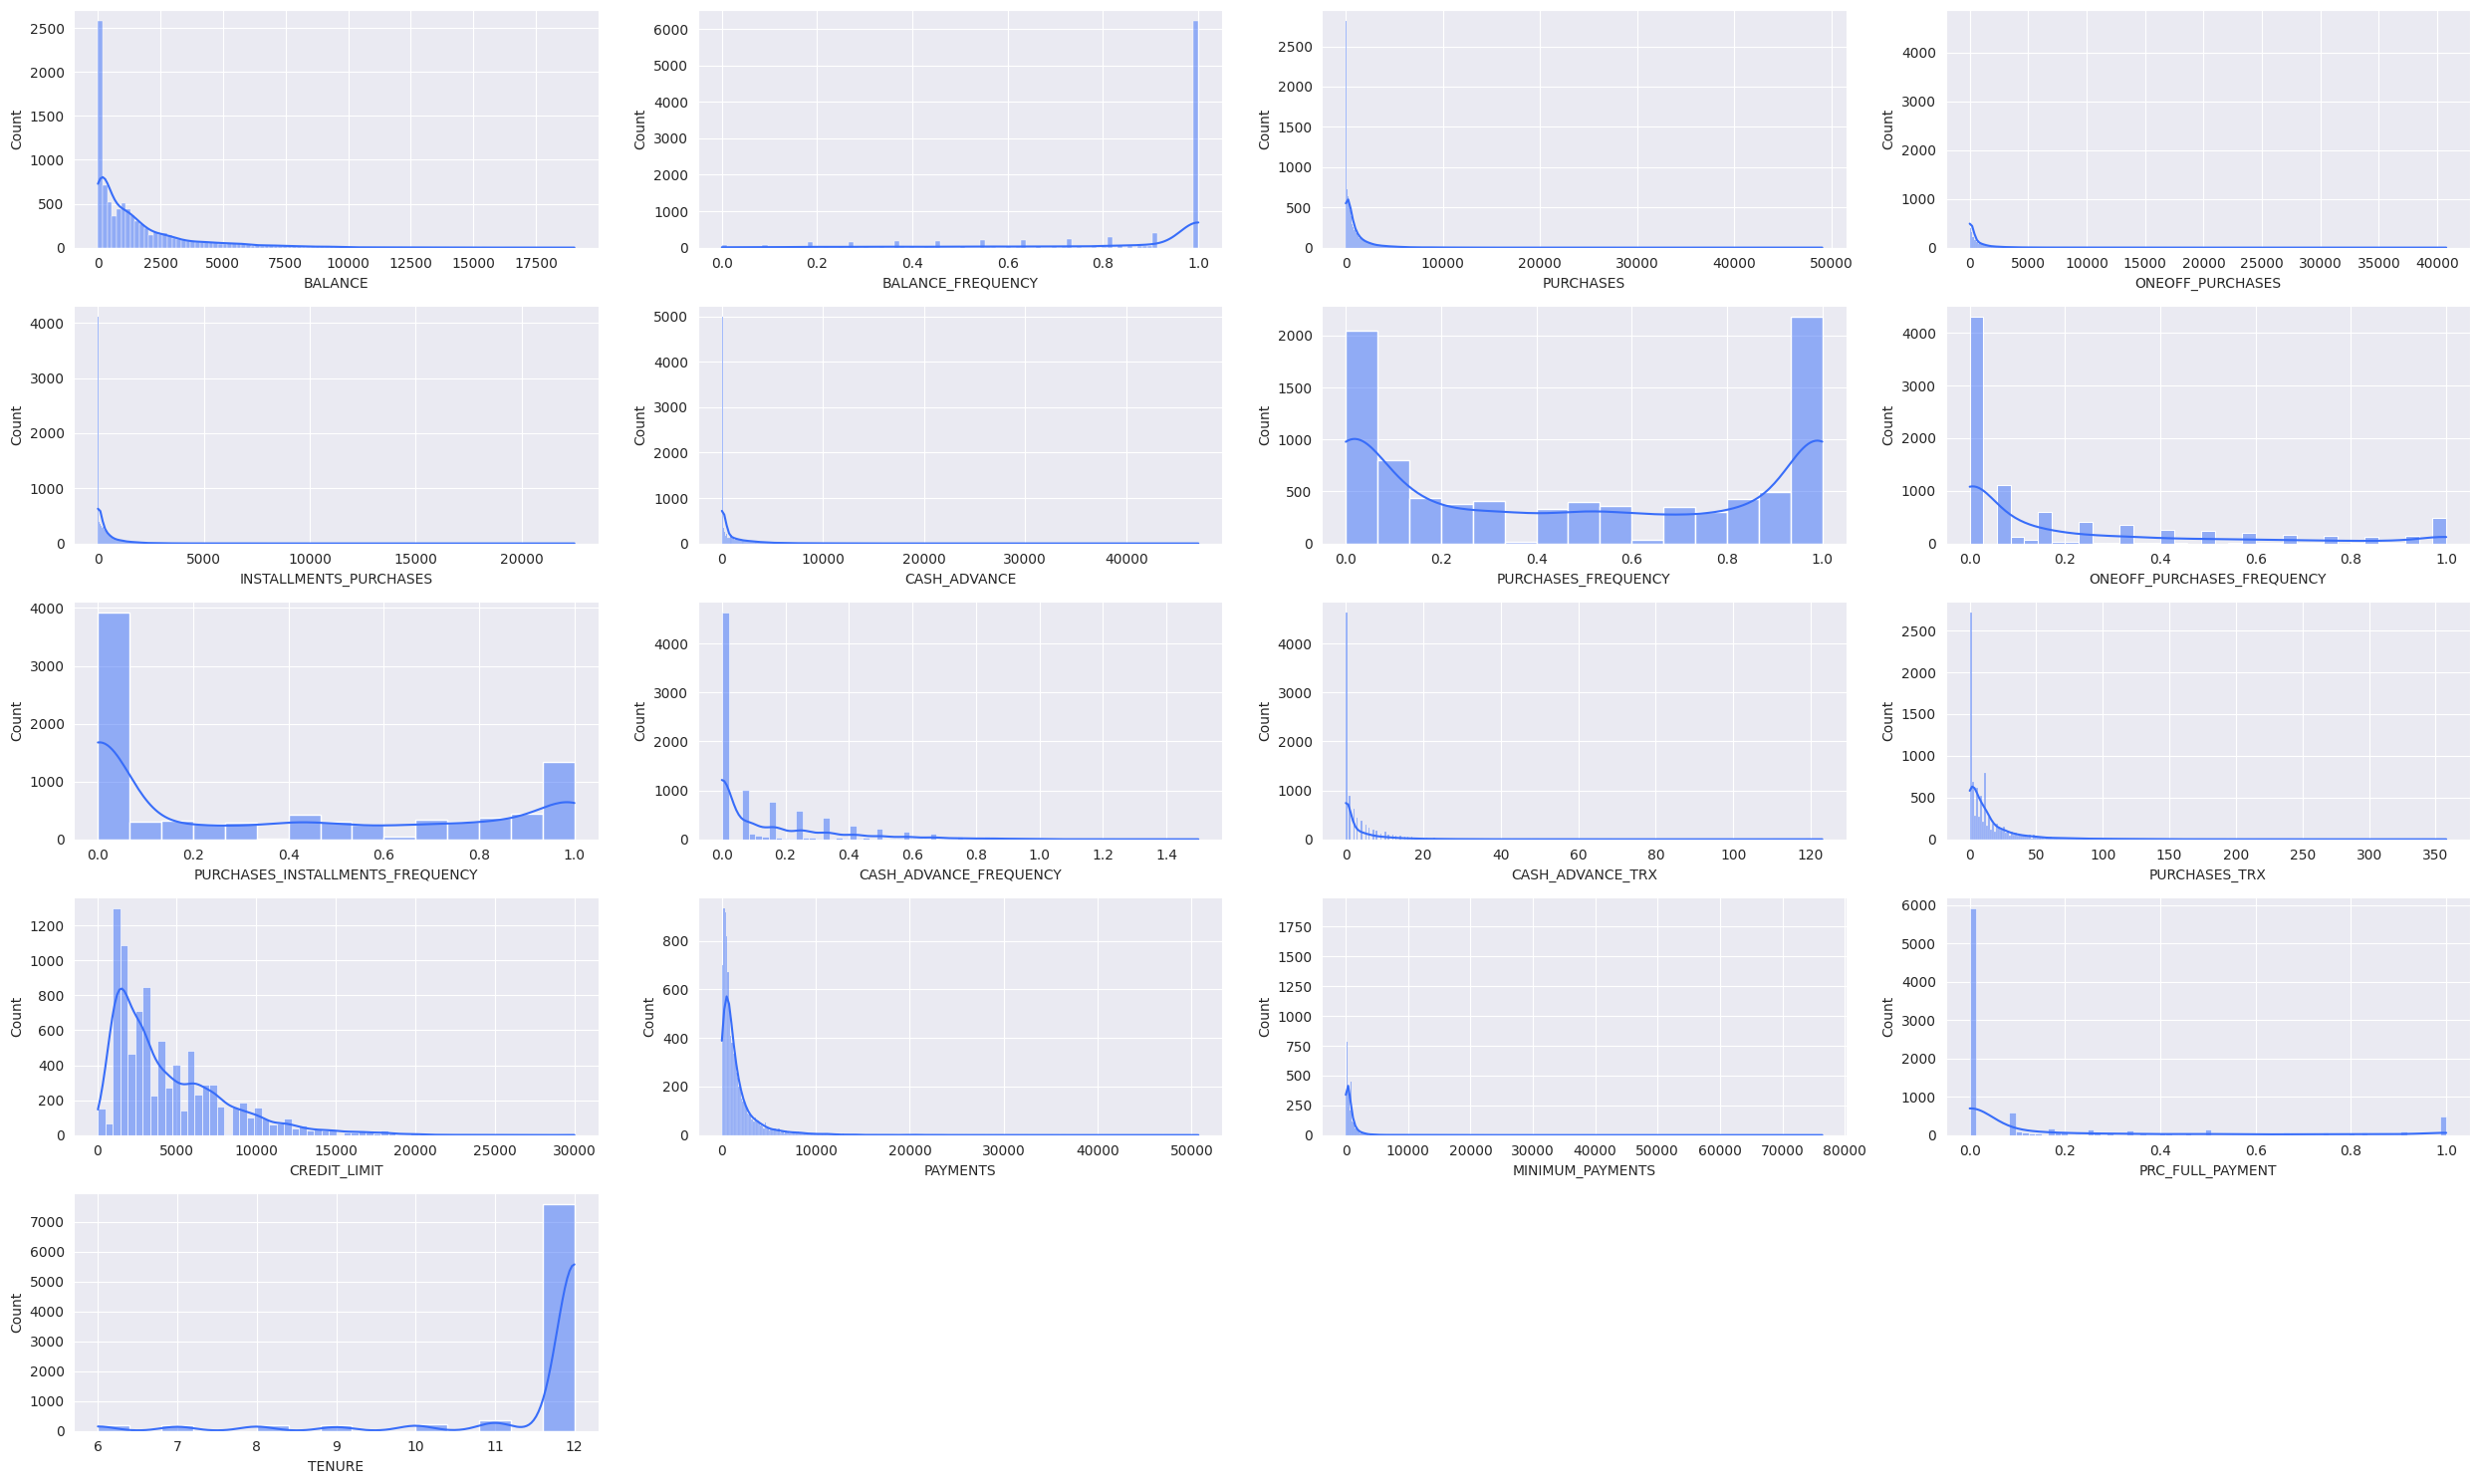

In [37]:
plt.figure(figsize=(25, 15))

for i, col in enumerate(df.columns, start=1):
    sns.set_style('darkgrid')
    sns.set_palette('rainbow')
    plt.subplot(5, 4, i)
    sns.histplot(data=df, x=col, bins='auto', kde=True)
plt.tight_layout()
plt.show()

## 4.2 Boxplot <a id=4.2></a>

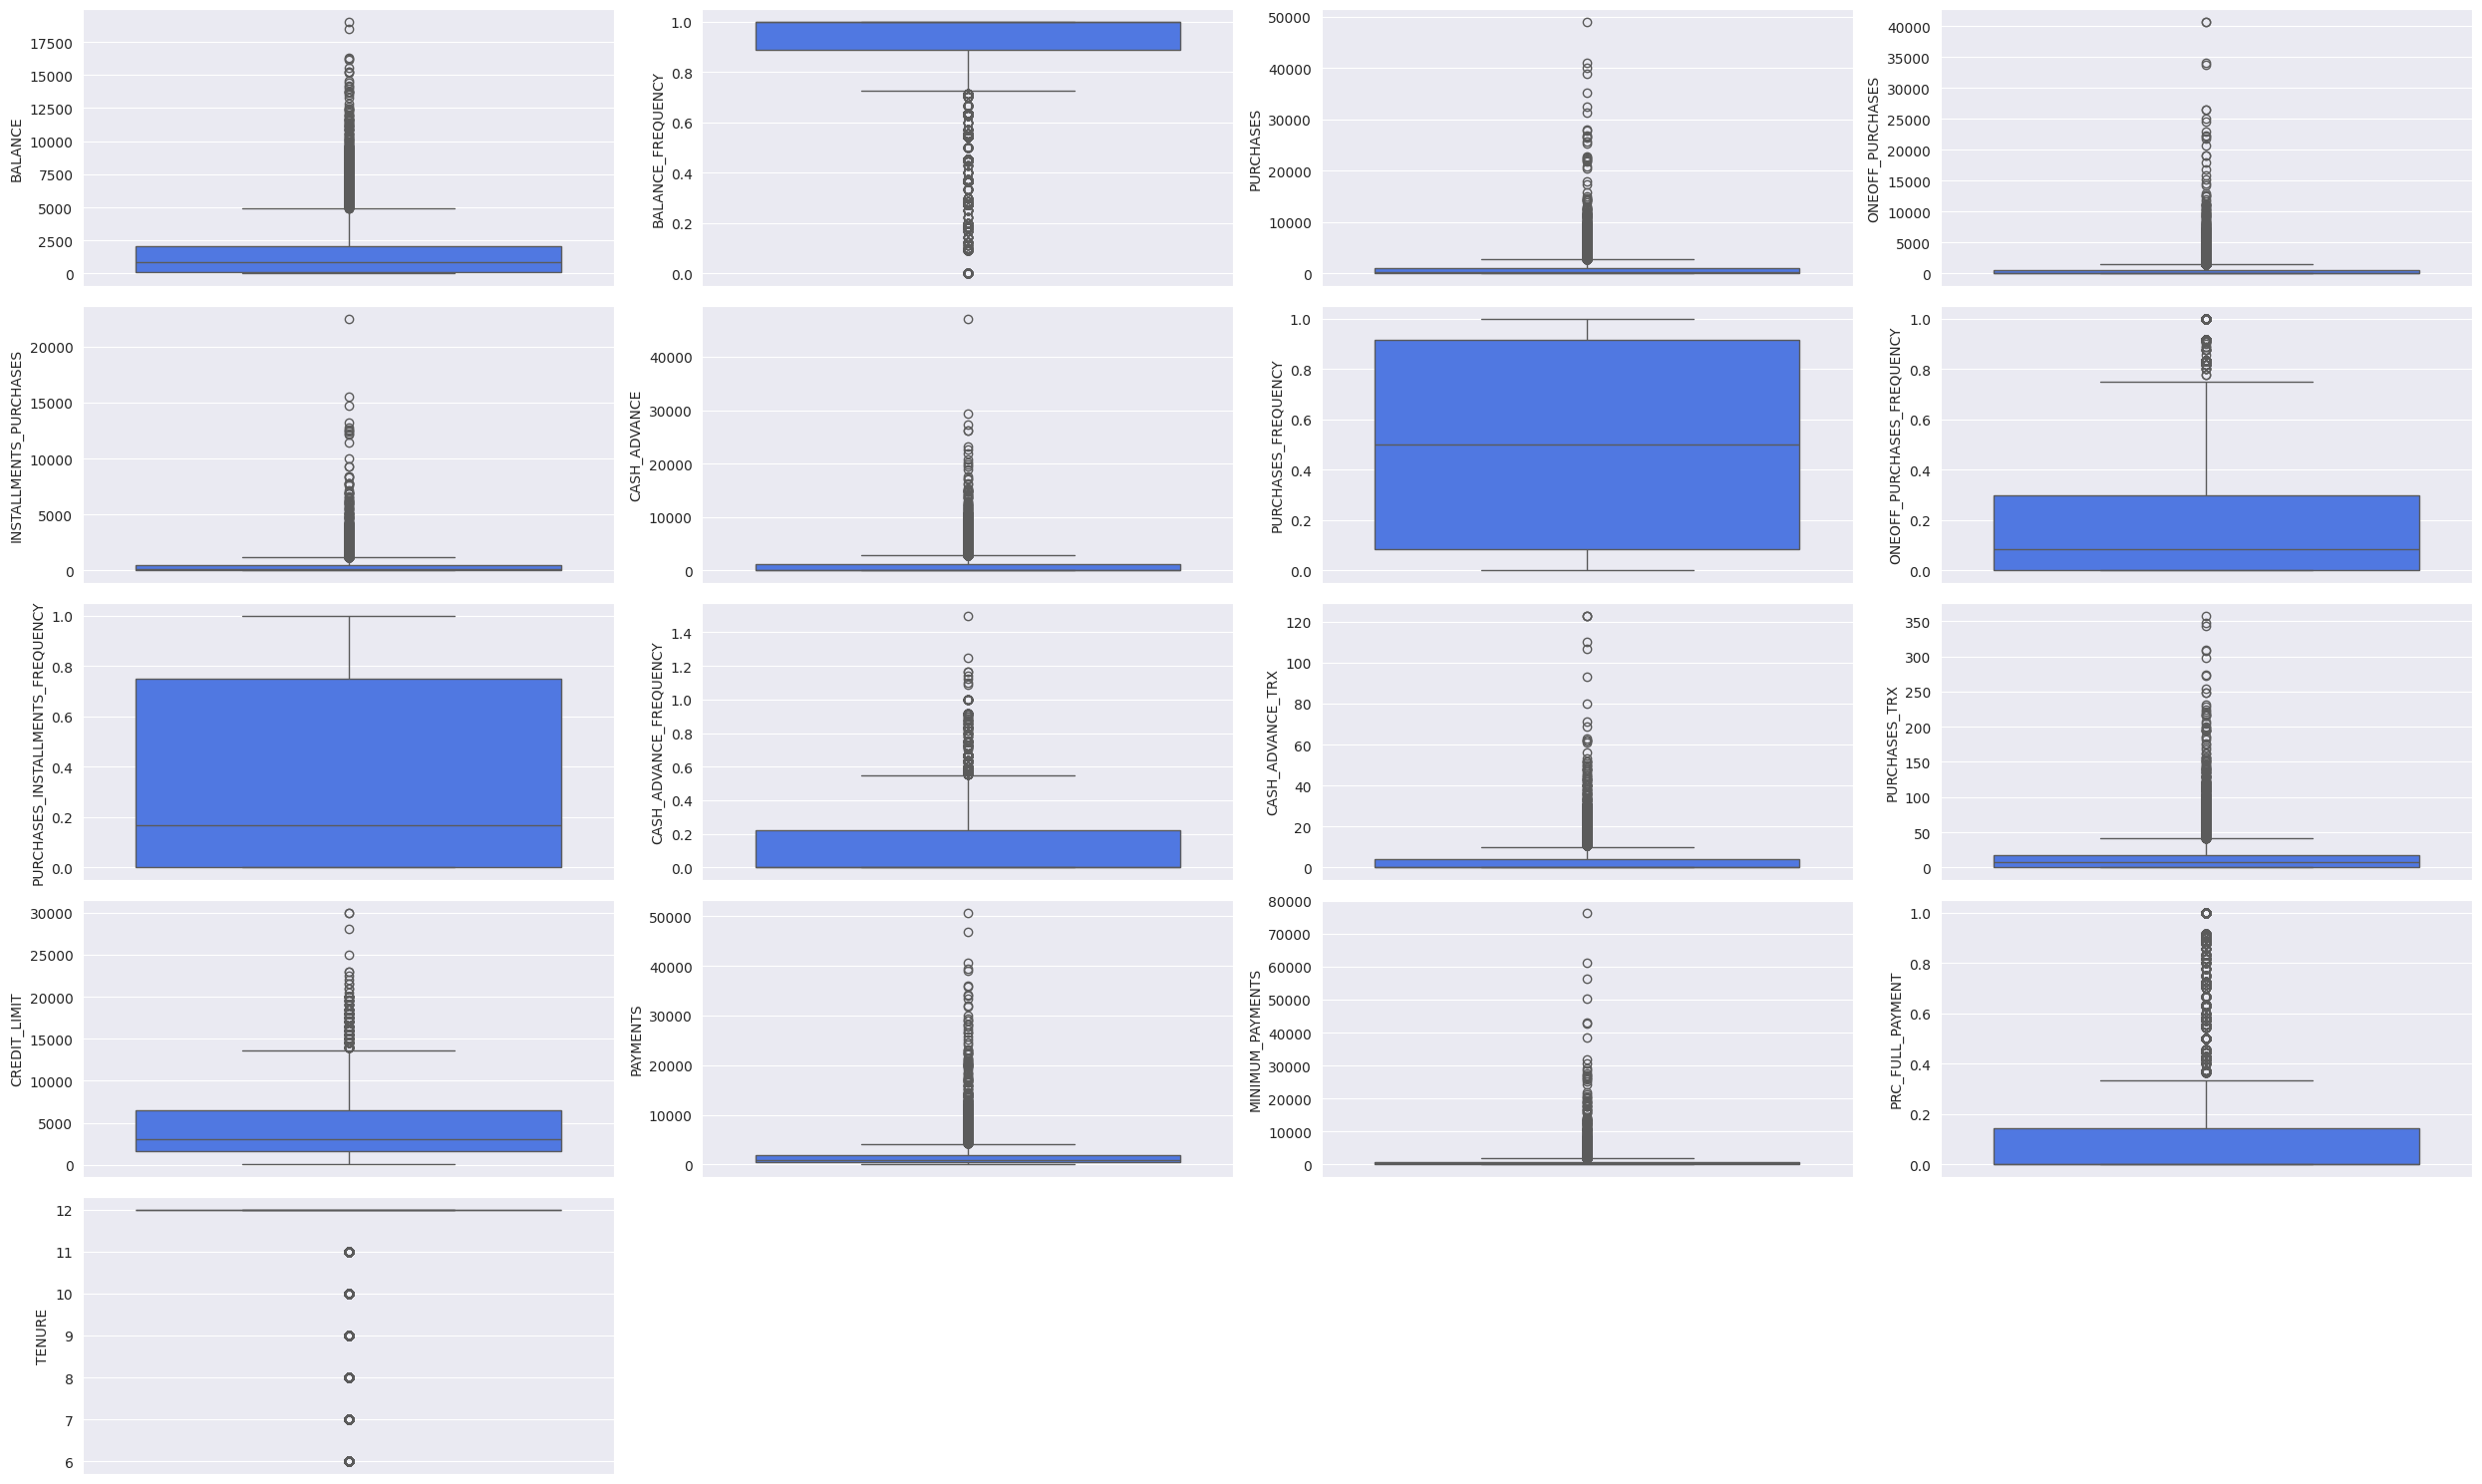

In [39]:
plt.figure(figsize=(25, 15))

for i, col in enumerate(df.columns, start=1):
    sns.set_style('darkgrid')
    sns.set_palette('rainbow')
    plt.subplot(5, 4, i)
    sns.boxplot(data=df, y=col)
plt.tight_layout()
plt.show()

## 4.3 Correlation <a id=4.3></a>

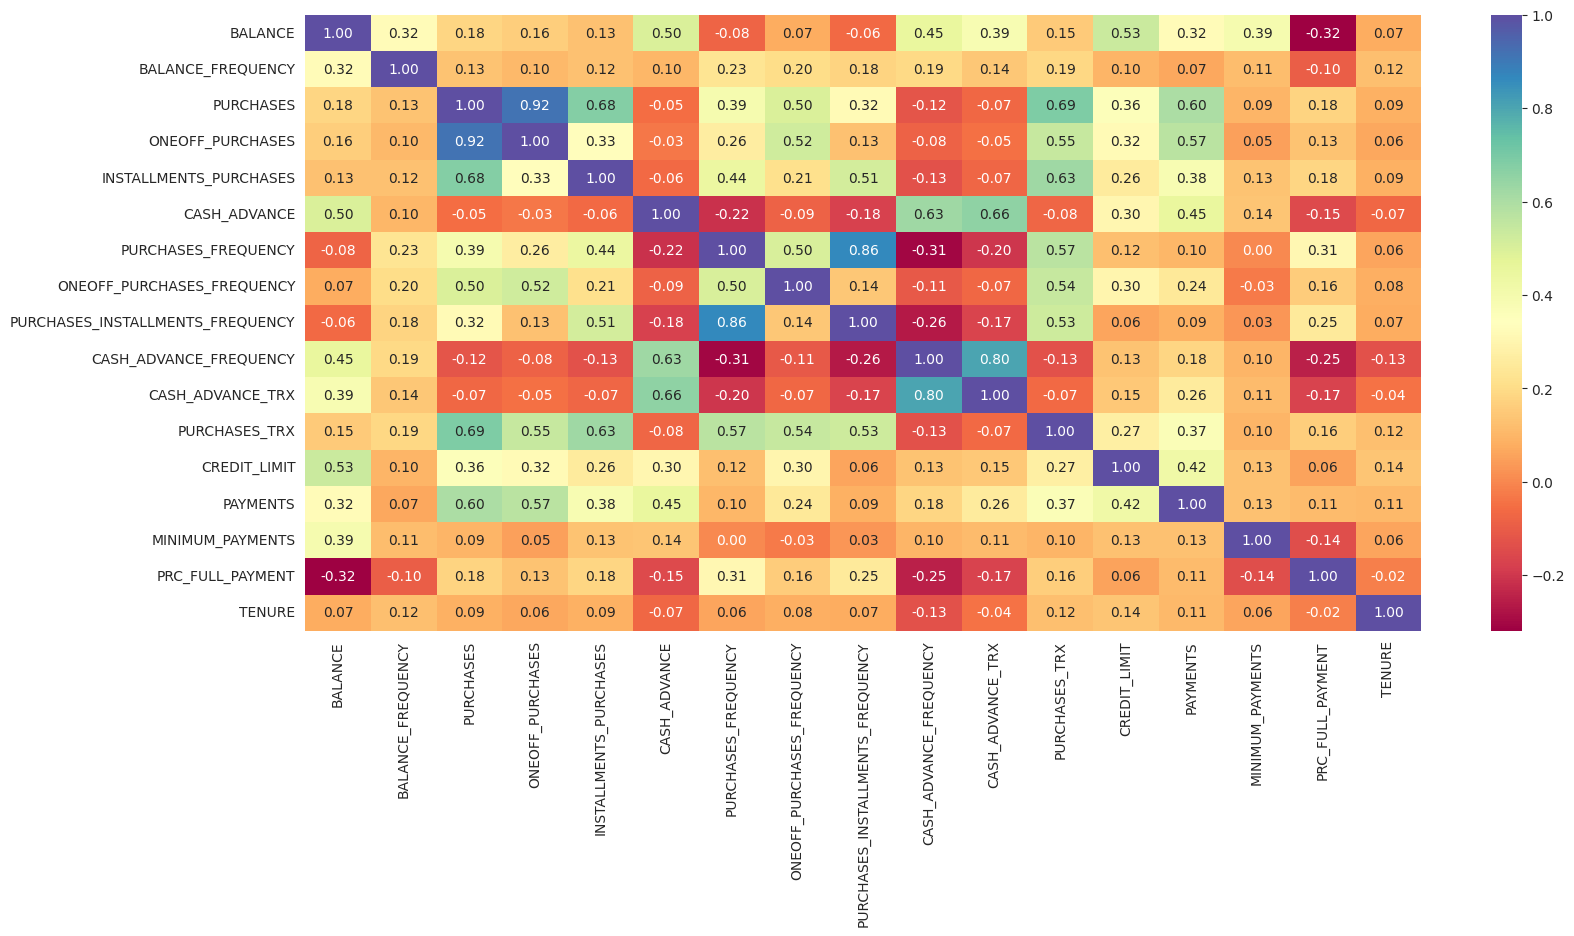

In [42]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Spectral')
plt.show()

# 5. Preparing For Modelling <a id=5></a>

## 5.1 Feature Scaling <a id=5.1></a>

In [82]:
df_2 = df.copy()
df_2.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_2 = scaler.fit_transform(df_2)
df_2

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [84]:
df_2.shape

(8950, 17)

## 5.2 Finding Optimal Number Of Cluster <a id=5.2></a>

In [85]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 20):
    k_means = KMeans(n_clusters=i, init='k-means++')
    k_means.fit(df_2)
    wcss.append(k_means.inertia_)

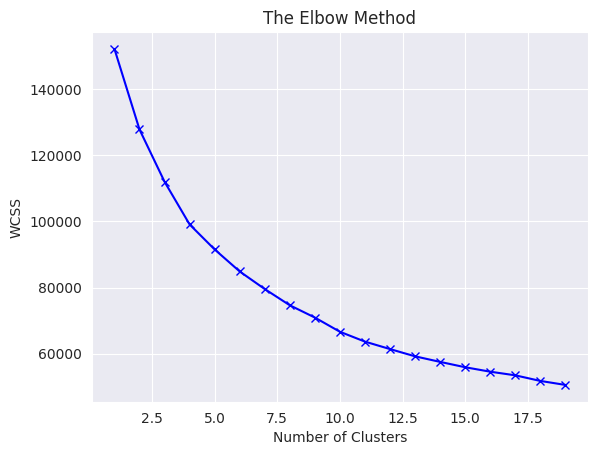

In [86]:
plt.plot(range(1, 20), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 6. Modelling <a id=6></a>

## 6.1 Customer Clustering By KMeans <a id=6.1></a>

In [87]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)

y_kmeans = kmeans.fit_predict(df_2)
# the values of y_kmeans will be in range from 0 to 7
# that is from cluster 1 to cluster 8
# the dependent variable will split all the customers into 8 different clusters

In [88]:
# Check y_kmeans
y_kmeans

array([3, 2, 7, ..., 5, 5, 5], dtype=int32)

### 6.1.1 Add Clusters to DataFrame <a id=6.1.1></a>

In [89]:
cluster_df = pd.DataFrame(y_kmeans, columns=['Cluster'])
cluster_df.head(2)

,Cluster
0,3
1,2


In [90]:
df_clst = pd.concat([df, cluster_df], axis=1)
df_clst

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,5
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,5
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,5
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,5


In [95]:
df_clst.groupby('Cluster')[df.columns].mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,3928.125451,0.988430,843.379636,99.862000,743.517636,889.924775,0.461708,0.035399,0.430992,0.104545,2.927273,16.672727,4145.454545,1510.251238,22855.761083,0.001515,11.909091
1,103.540821,0.371392,347.092201,209.719739,137.622715,301.615215,0.270648,0.074517,0.189152,0.030663,0.677909,4.353288,3868.203579,1149.392761,264.100759,0.240202,11.787521
2,4951.748564,0.970377,561.926515,345.695316,216.344040,5150.878965,0.305957,0.147065,0.201923,0.520451,16.380688,8.735849,8119.816366,4130.737625,1720.769404,0.039910,11.611543
3,1561.813901,0.972343,274.910518,225.156813,49.929319,740.480931,0.167785,0.104431,0.065703,0.149372,2.899929,3.218595,3385.900166,1009.497197,712.406163,0.021545,11.882186
4,4662.671853,0.972850,16842.556892,11469.688108,5372.868784,1038.757441,0.920946,0.761835,0.773096,0.073198,2.513514,136.864865,12714.864865,16593.236130,2687.311037,0.396117,11.959459
5,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
6,775.055730,0.955450,920.927014,209.807280,711.559124,210.764405,0.884599,0.099782,0.830163,0.040075,0.783571,18.966552,3504.953370,1091.829891,607.634658,0.245813,11.854402
7,1862.004038,0.979271,3088.044242,2131.070678,957.452033,334.216445,0.932192,0.765109,0.582228,0.053745,1.090909,45.232057,7123.785704,2928.646753,746.046418,0.291866,11.928230
